# **WASP Summer School**
## Behavior Tree Challenge

## Install the code repository and the used packages.

In [1]:
#!apt-get update #If apt install fails, run this

In [2]:
#Make sure all code is available
!rm -r WASP-CBSS-BT/
!git clone https://github.com/jstyrud/WASP-CBSS-BT.git
!pip install celluloid
!apt install imagemagick

Cloning into 'WASP-CBSS-BT'...
remote: Enumerating objects: 695, done.
remote: Counting objects: 100% (695/695), done.
remote: Compressing objects: 100% (389/389), done.
remote: Total 695 (delta 359), reused 624 (delta 299), pack-reused 0
Receiving objects: 100% (695/695), 11.30 MiB | 17.41 MiB/s, done.
Resolving deltas: 100% (359/359), done.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
imagemagick is already the newest version (8:6.9.7.4+dfsg-16ubuntu6.11).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


## Import the modules.

*Note that if you are not running the notebook on Colab, the paths might differ.*  
*In such a case run the following command on a shell to output the content of the current working directory.*  
```bash
!ls
```

In [3]:
#Setup paths and imports
import sys
sys.path.insert(0,'/content/WASP-CBSS-BT')
from IPython.display import Image
import simulation.notebook_interface as notebook_interface
import simulation.behavior_tree as behavior_tree
behavior_tree.load_settings_from_file('/content/WASP-CBSS-BT/simulation/tests/BT_TEST_SETTINGS.yaml')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pathlib import Path

## Build your own Behavior Tree and test it!

Writing behavior_tree.png
Writing behavior_tree.svg


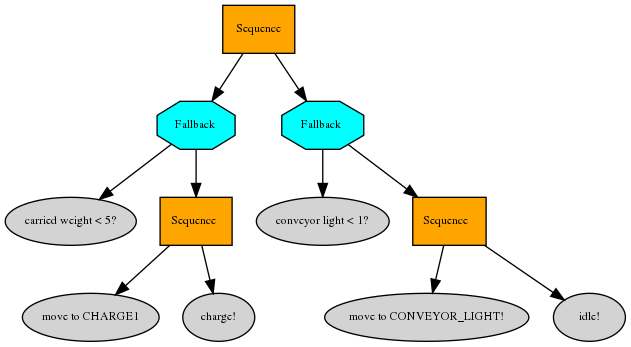

In [20]:
#Setup individual and show it
individual = ['s(', 'f(', 'carried weight < 5?', \
                          's(', 'move to CHARGE1', 'charge!', ')', ')', \
                    'f(', 'conveyor light < 1?', 's(', 'move to CONVEYOR_LIGHT!', 'idle!', ')']

environment = notebook_interface.Environment(seed=0, verbose=False)
environment.plot_individual('', 'behavior_tree', individual)

Image('behavior_tree.png')  

In [21]:
#Run individual and print result (takes a lot less time with show_world=False)
print("Fitness:", environment.get_fitness(individual, show_world=True)) 

Fitness: -7.45


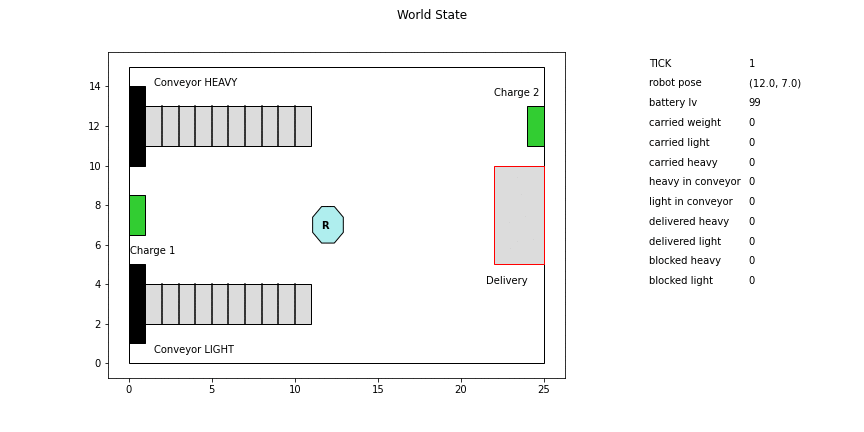

In [22]:
#Animate the last run (that had show_world=True)
gifPath = Path("/content/animation.gif")
# Display GIF in Jupyter, CoLab, IPython
with open(gifPath,'rb') as f:
    Image(data=f.read(), format='png')

In [7]:
#Step the run instead, first reset the environment
step_environment = notebook_interface.Environment(seed=0, verbose=False)

Writing behavior_tree.png
Writing behavior_tree.svg


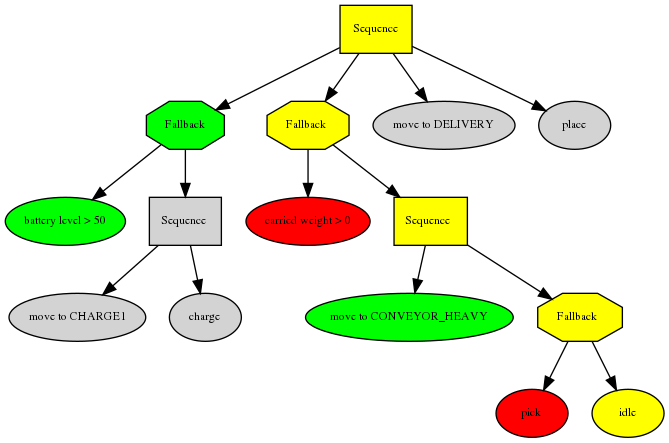

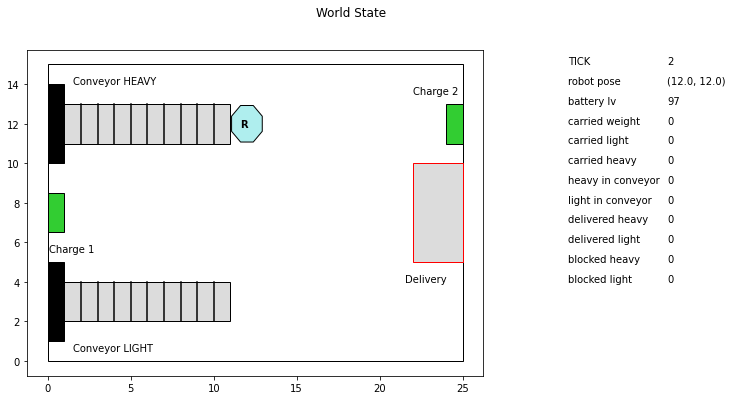

In [9]:
#Step the run one step.
#Execute the cell again to step forward.
#Color coding of states:
#green  = success
#red    = failure
#yellow = running
#gray   = not ticked
number_of_steps = 1 #Change this to step more than once
for _ in range(number_of_steps):
    step_environment.step(individual, show_world=True)
    step_environment.pytree.save_fig('','behavior_tree', static=False)
    
    with open(Path("/content/behavior_tree.png"),'rb') as f:
      Image(data=f.read(), format='png')